# Load data

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
from ucimlrepo import fetch_ucirepo 


# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
data = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.original)


In [3]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
data.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [5]:
data = data.drop(['ID'], axis=1)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


<Axes: >

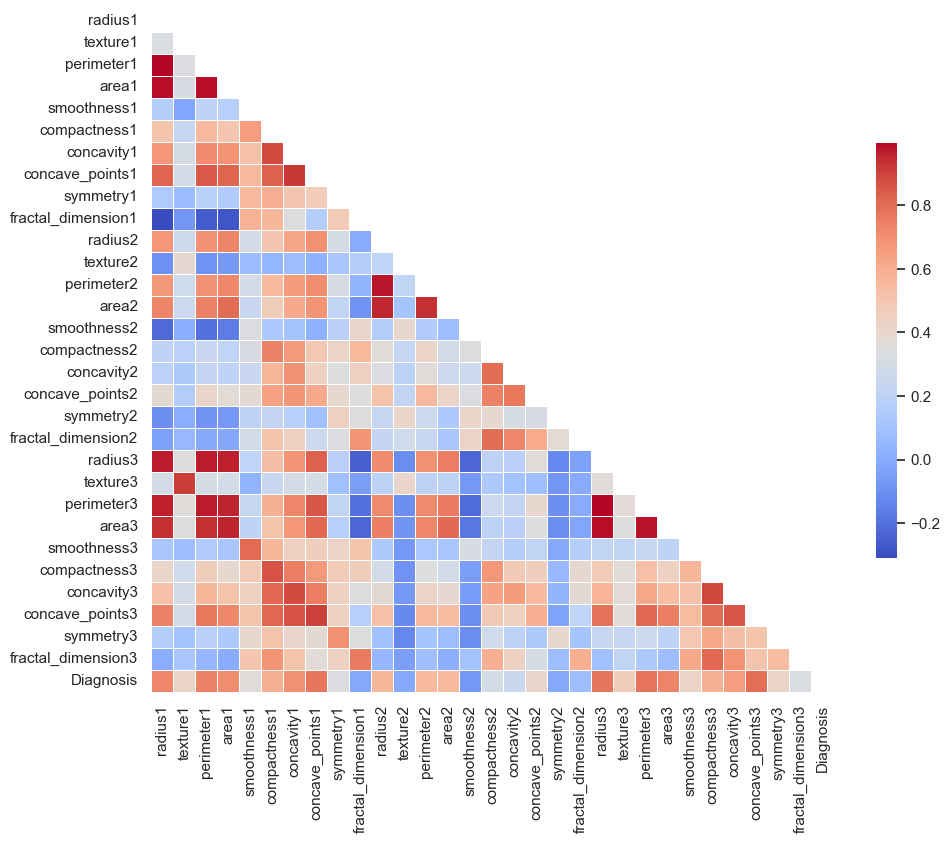

In [6]:
sns.set_theme(style="white")
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='coolwarm',square=True, linewidths=.5, cbar_kws={"shrink": .6})


# Outlier Detection

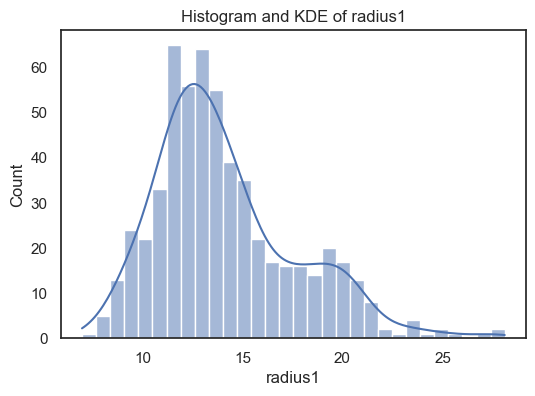

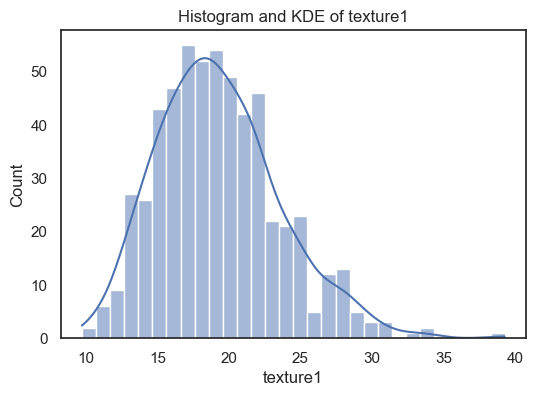

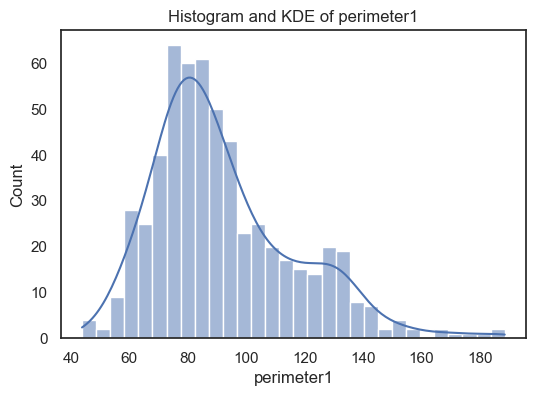

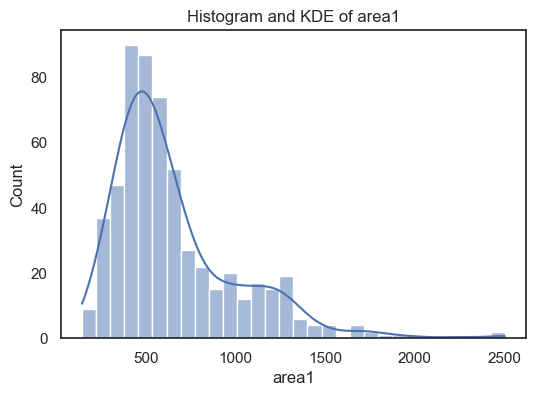

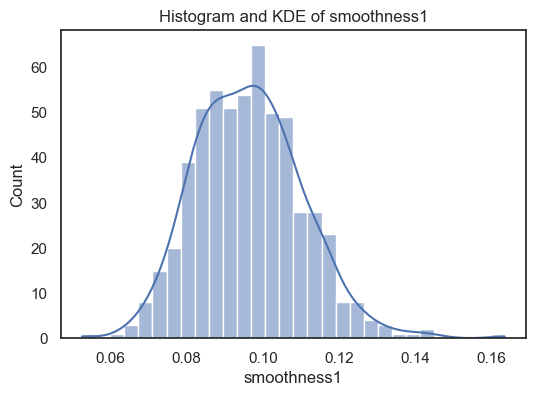

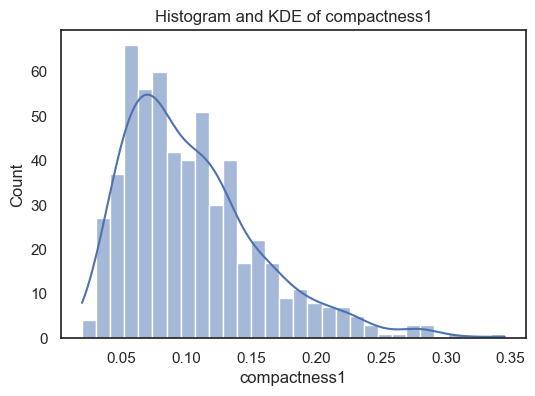

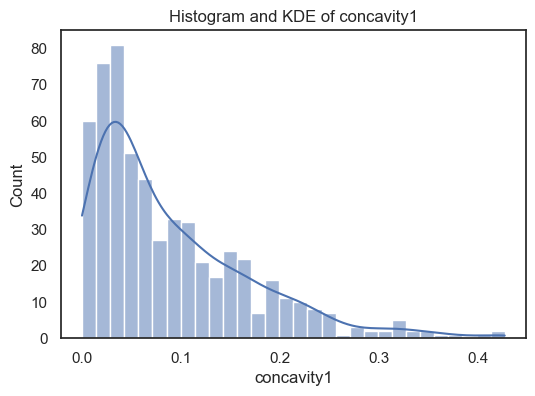

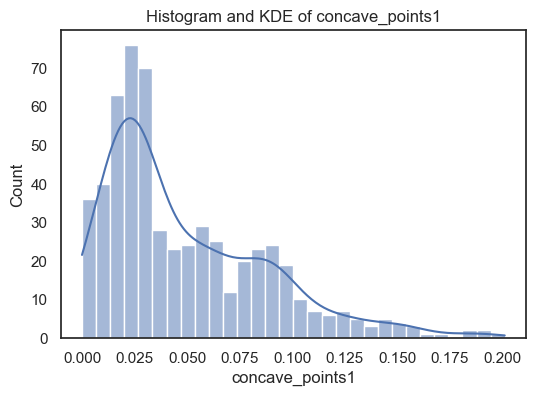

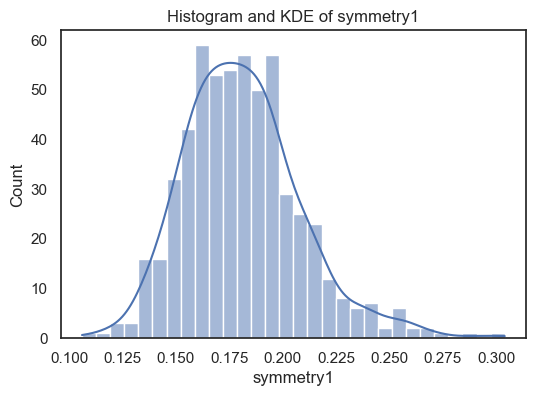

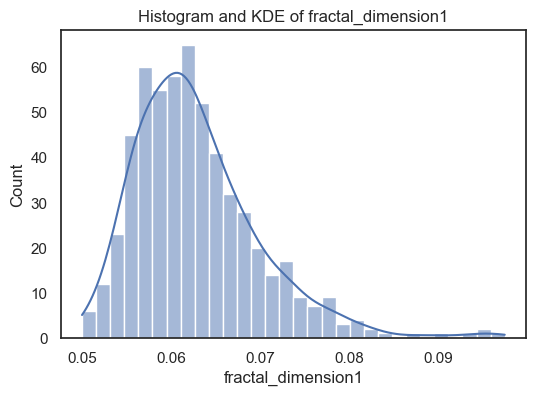

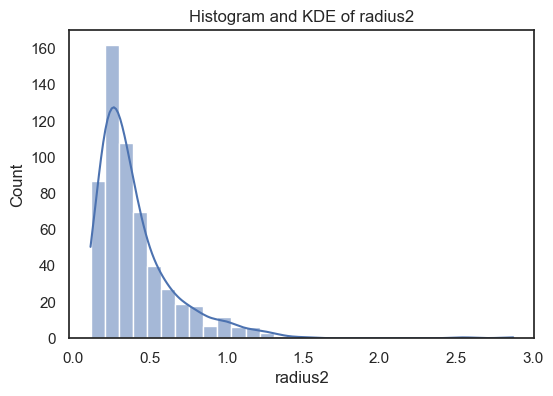

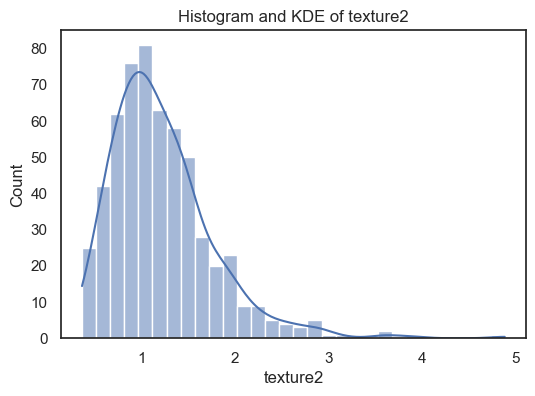

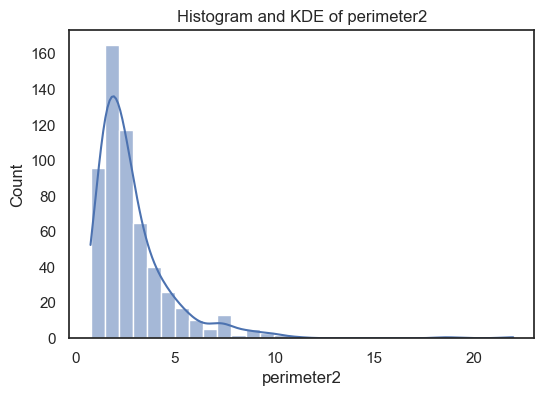

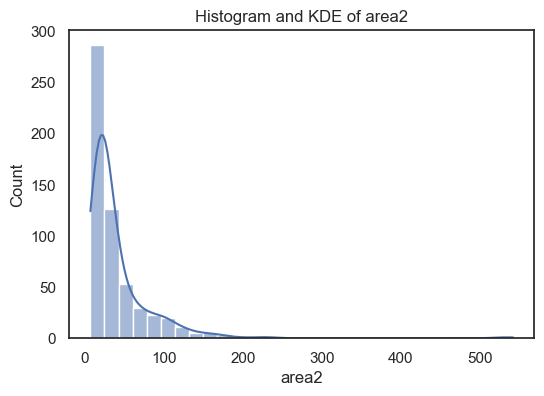

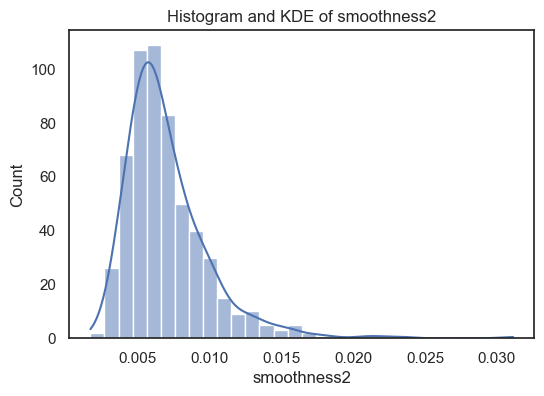

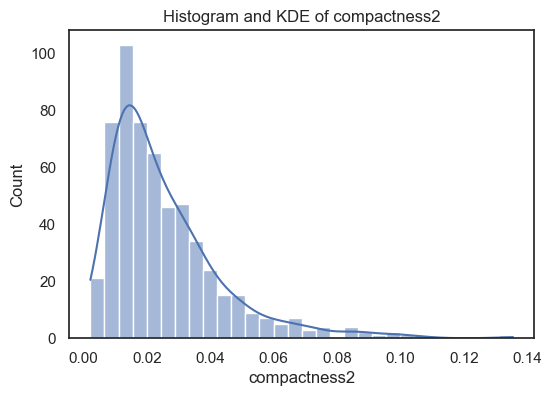

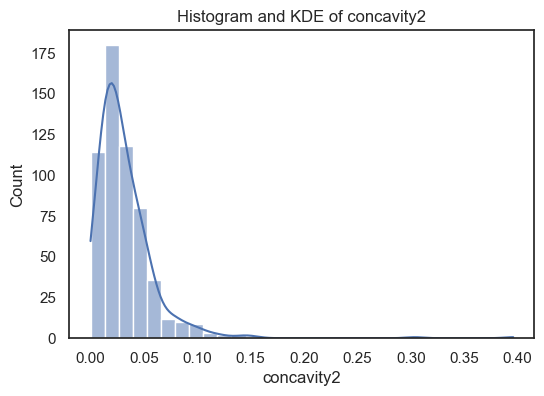

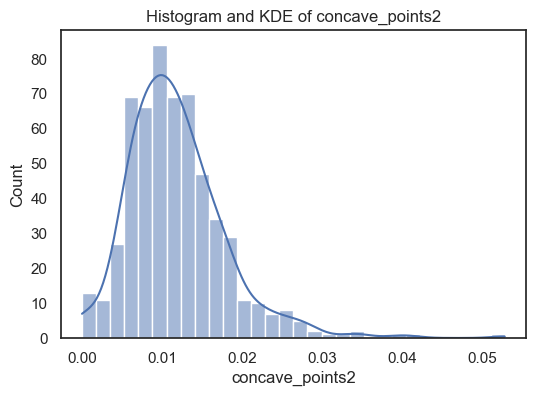

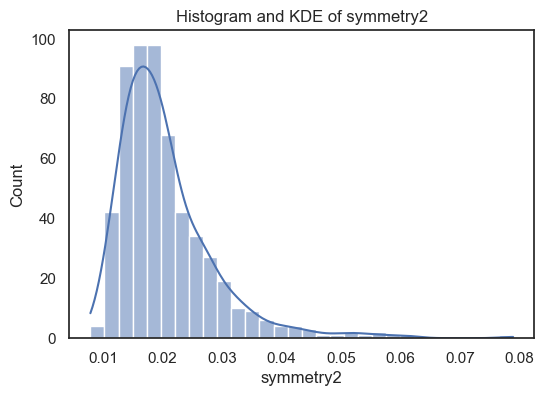

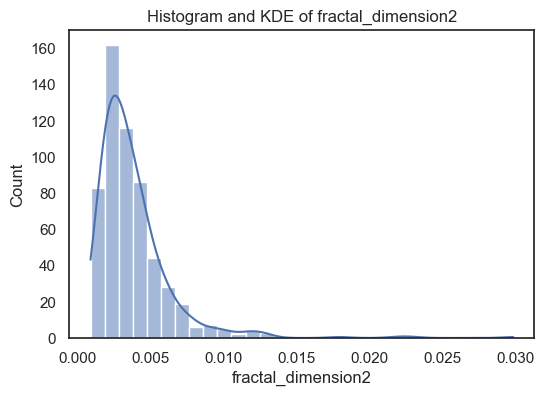

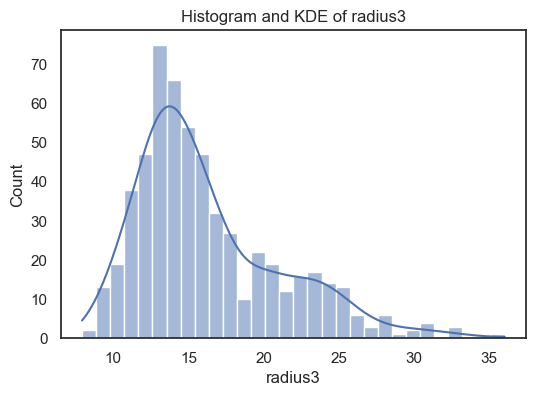

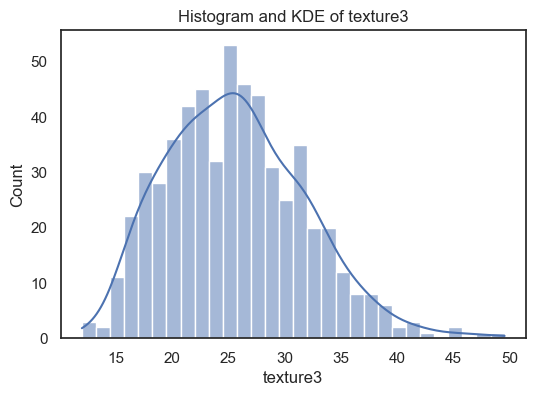

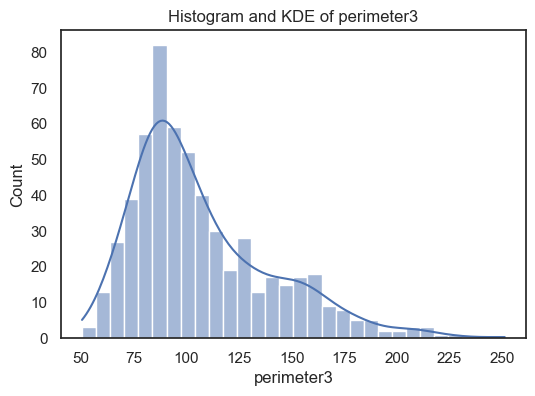

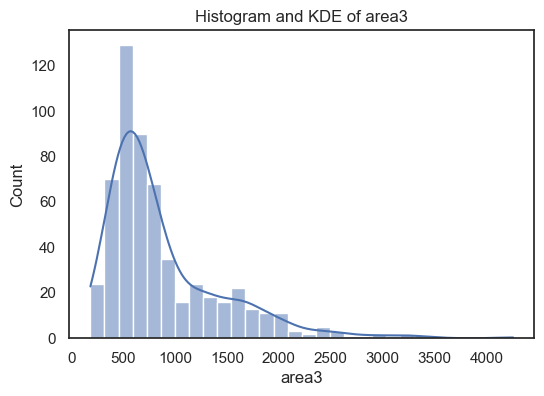

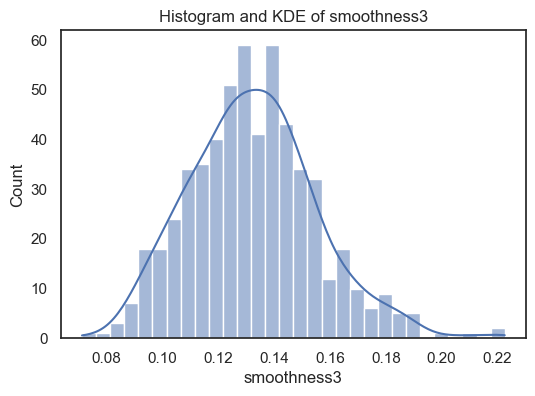

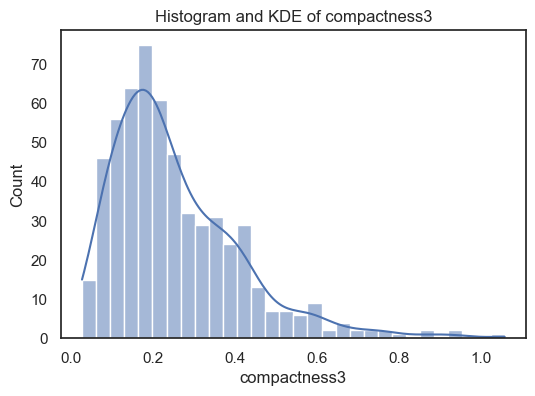

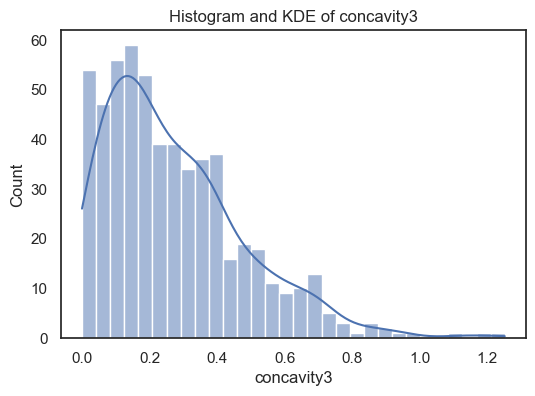

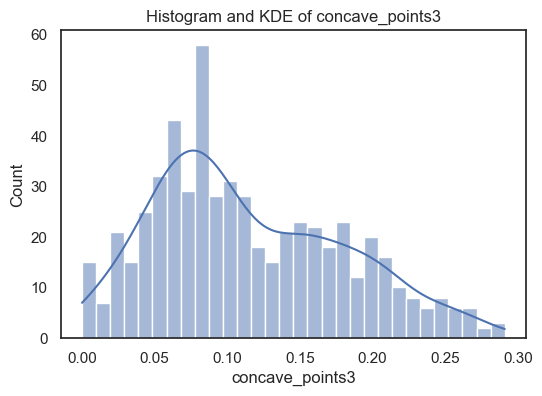

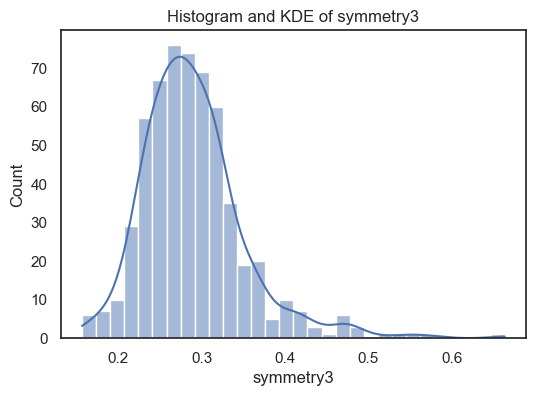

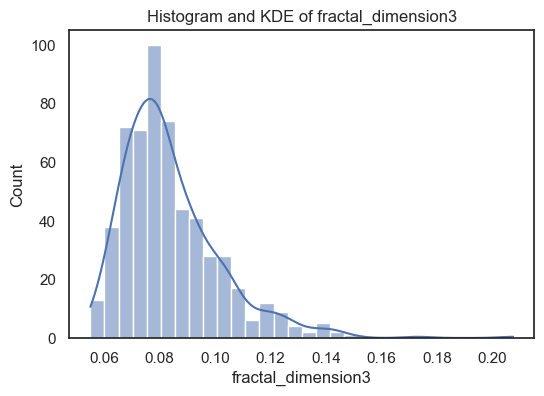

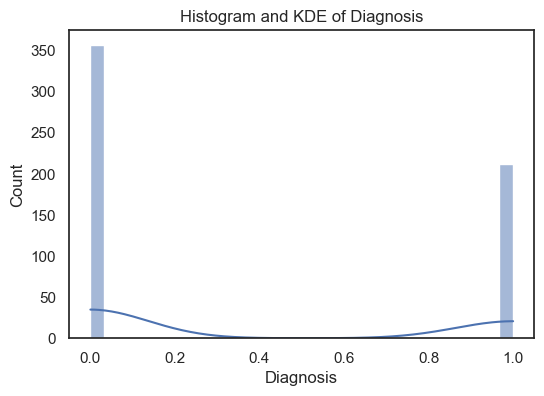

In [7]:
for col in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.xlabel(col)
    plt.title(f'Histogram and KDE of {col}')
    plt.show()

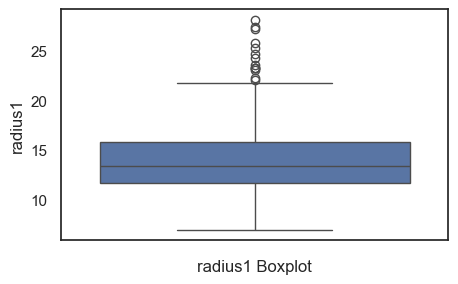

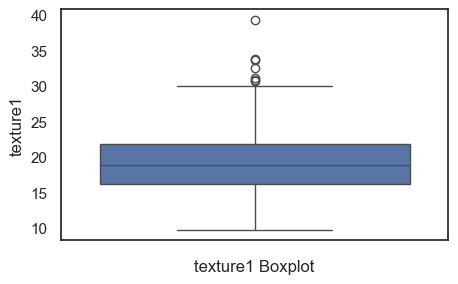

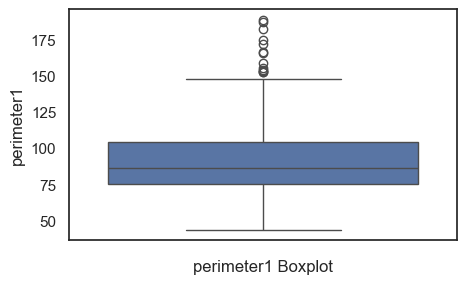

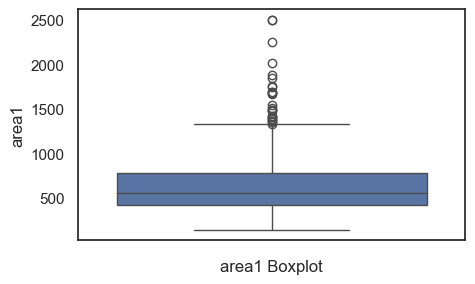

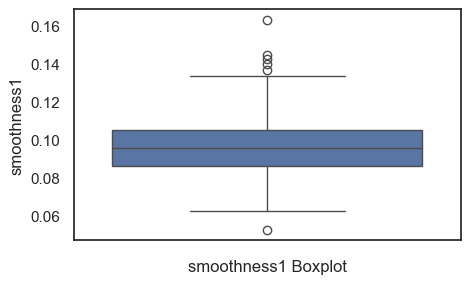

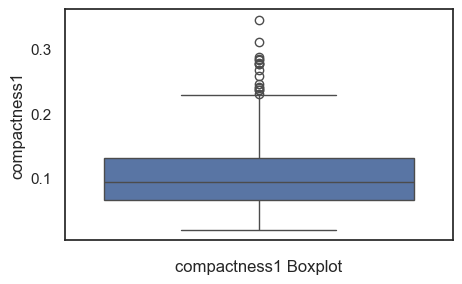

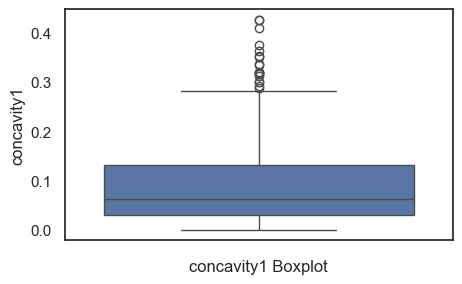

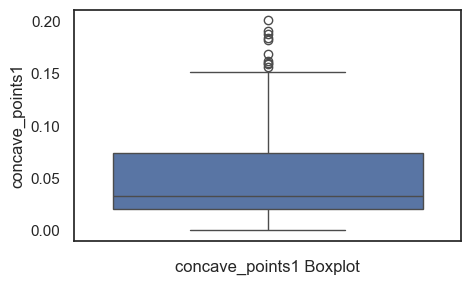

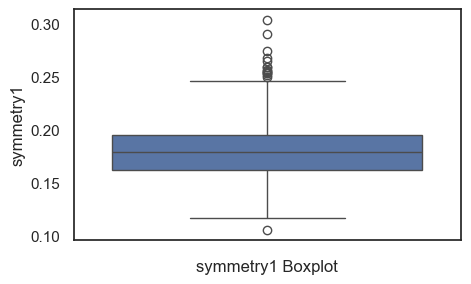

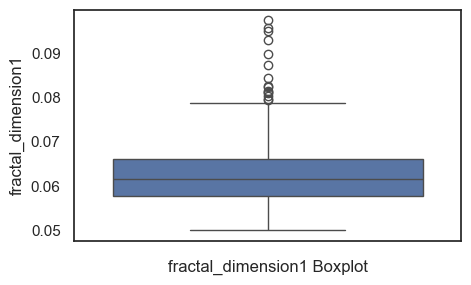

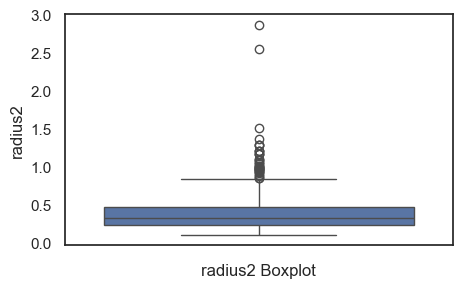

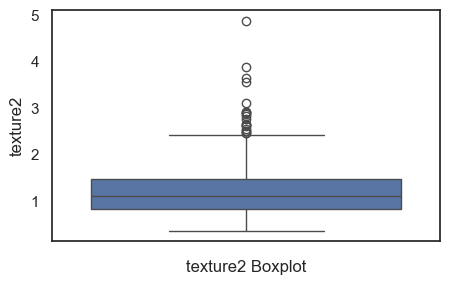

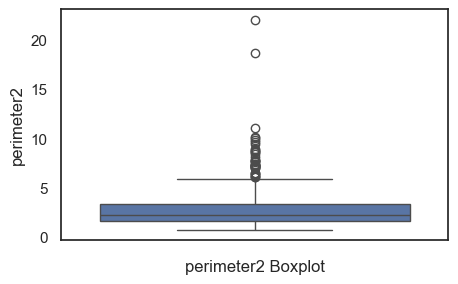

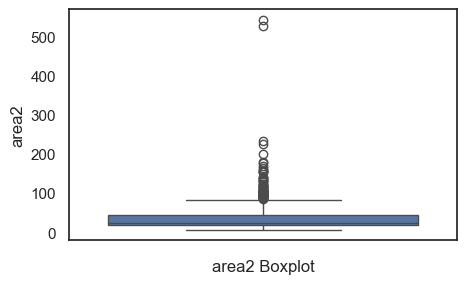

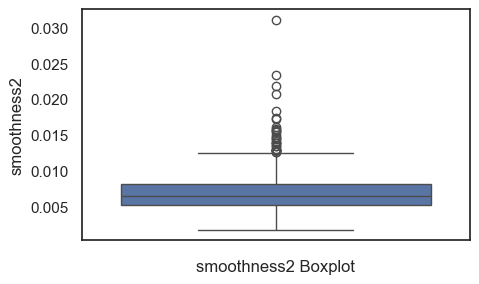

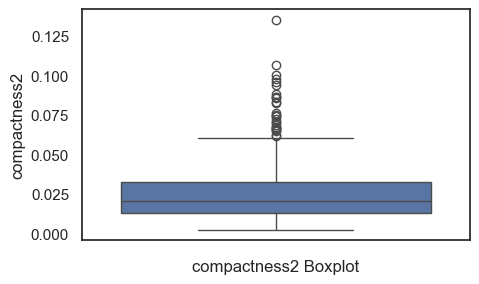

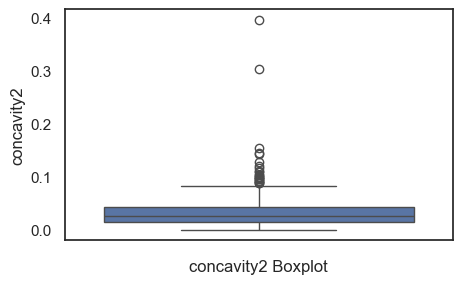

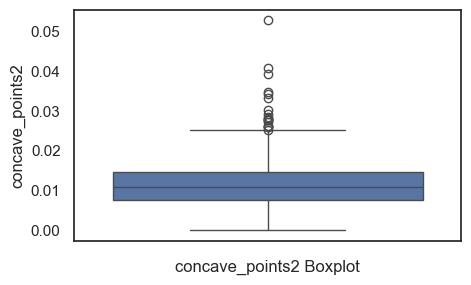

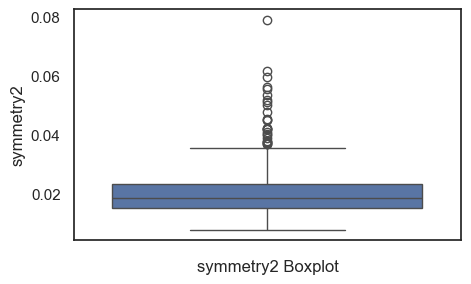

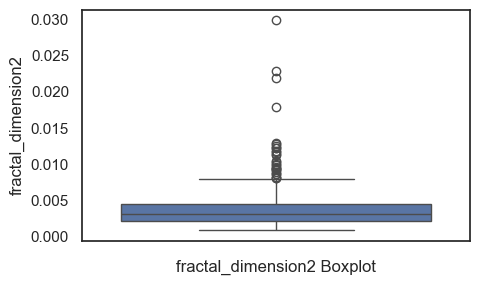

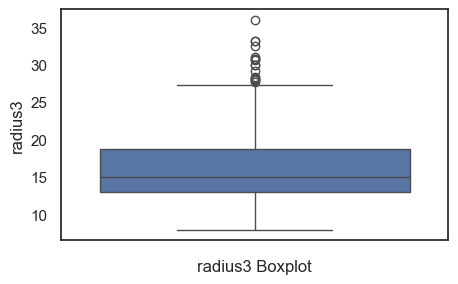

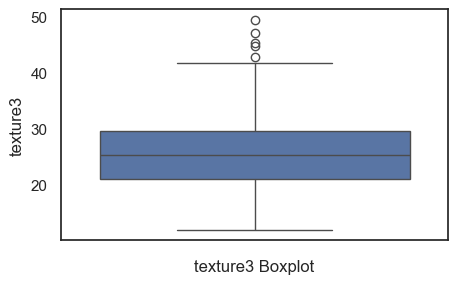

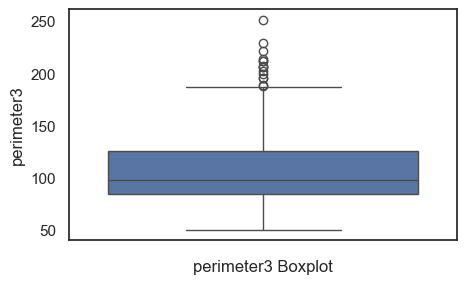

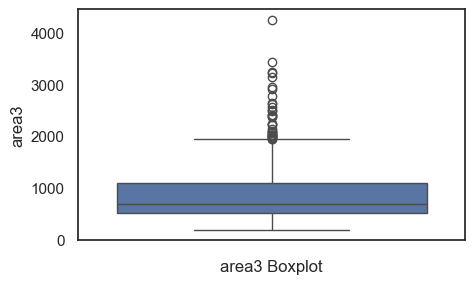

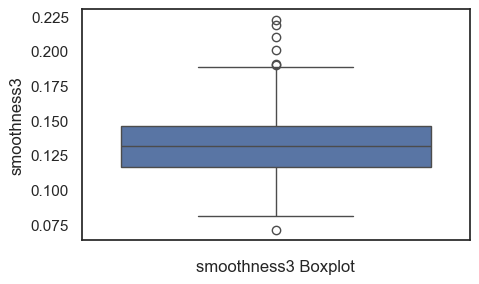

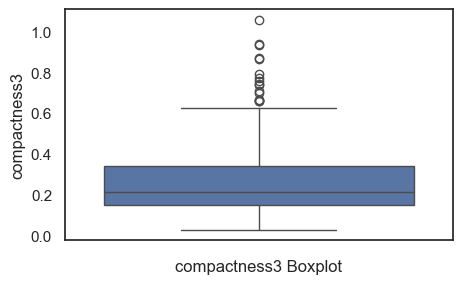

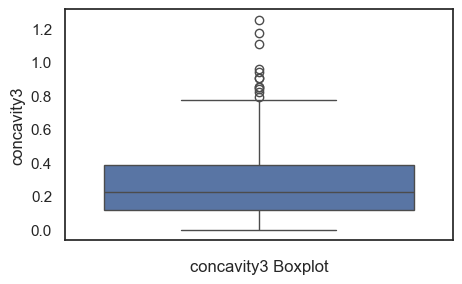

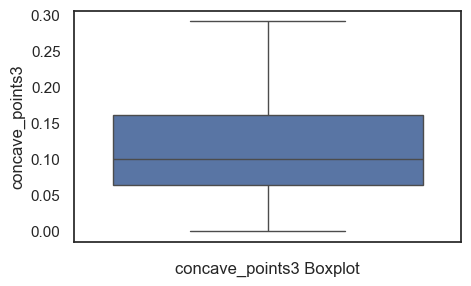

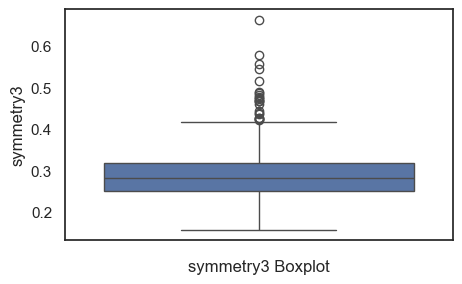

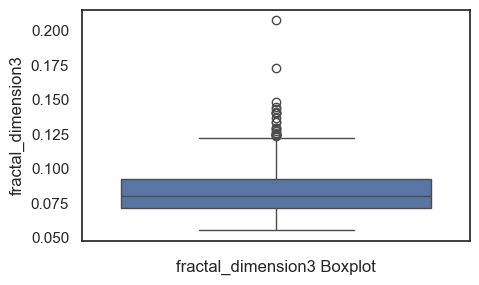

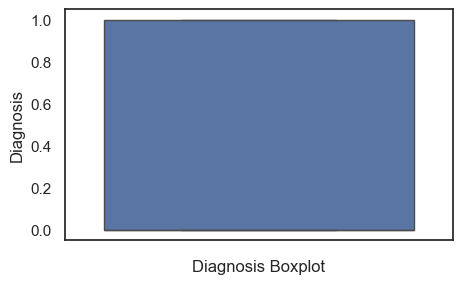

In [8]:
for col in data.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data[col])
    plt.xlabel(f"{col} Boxplot")
    plt.show()

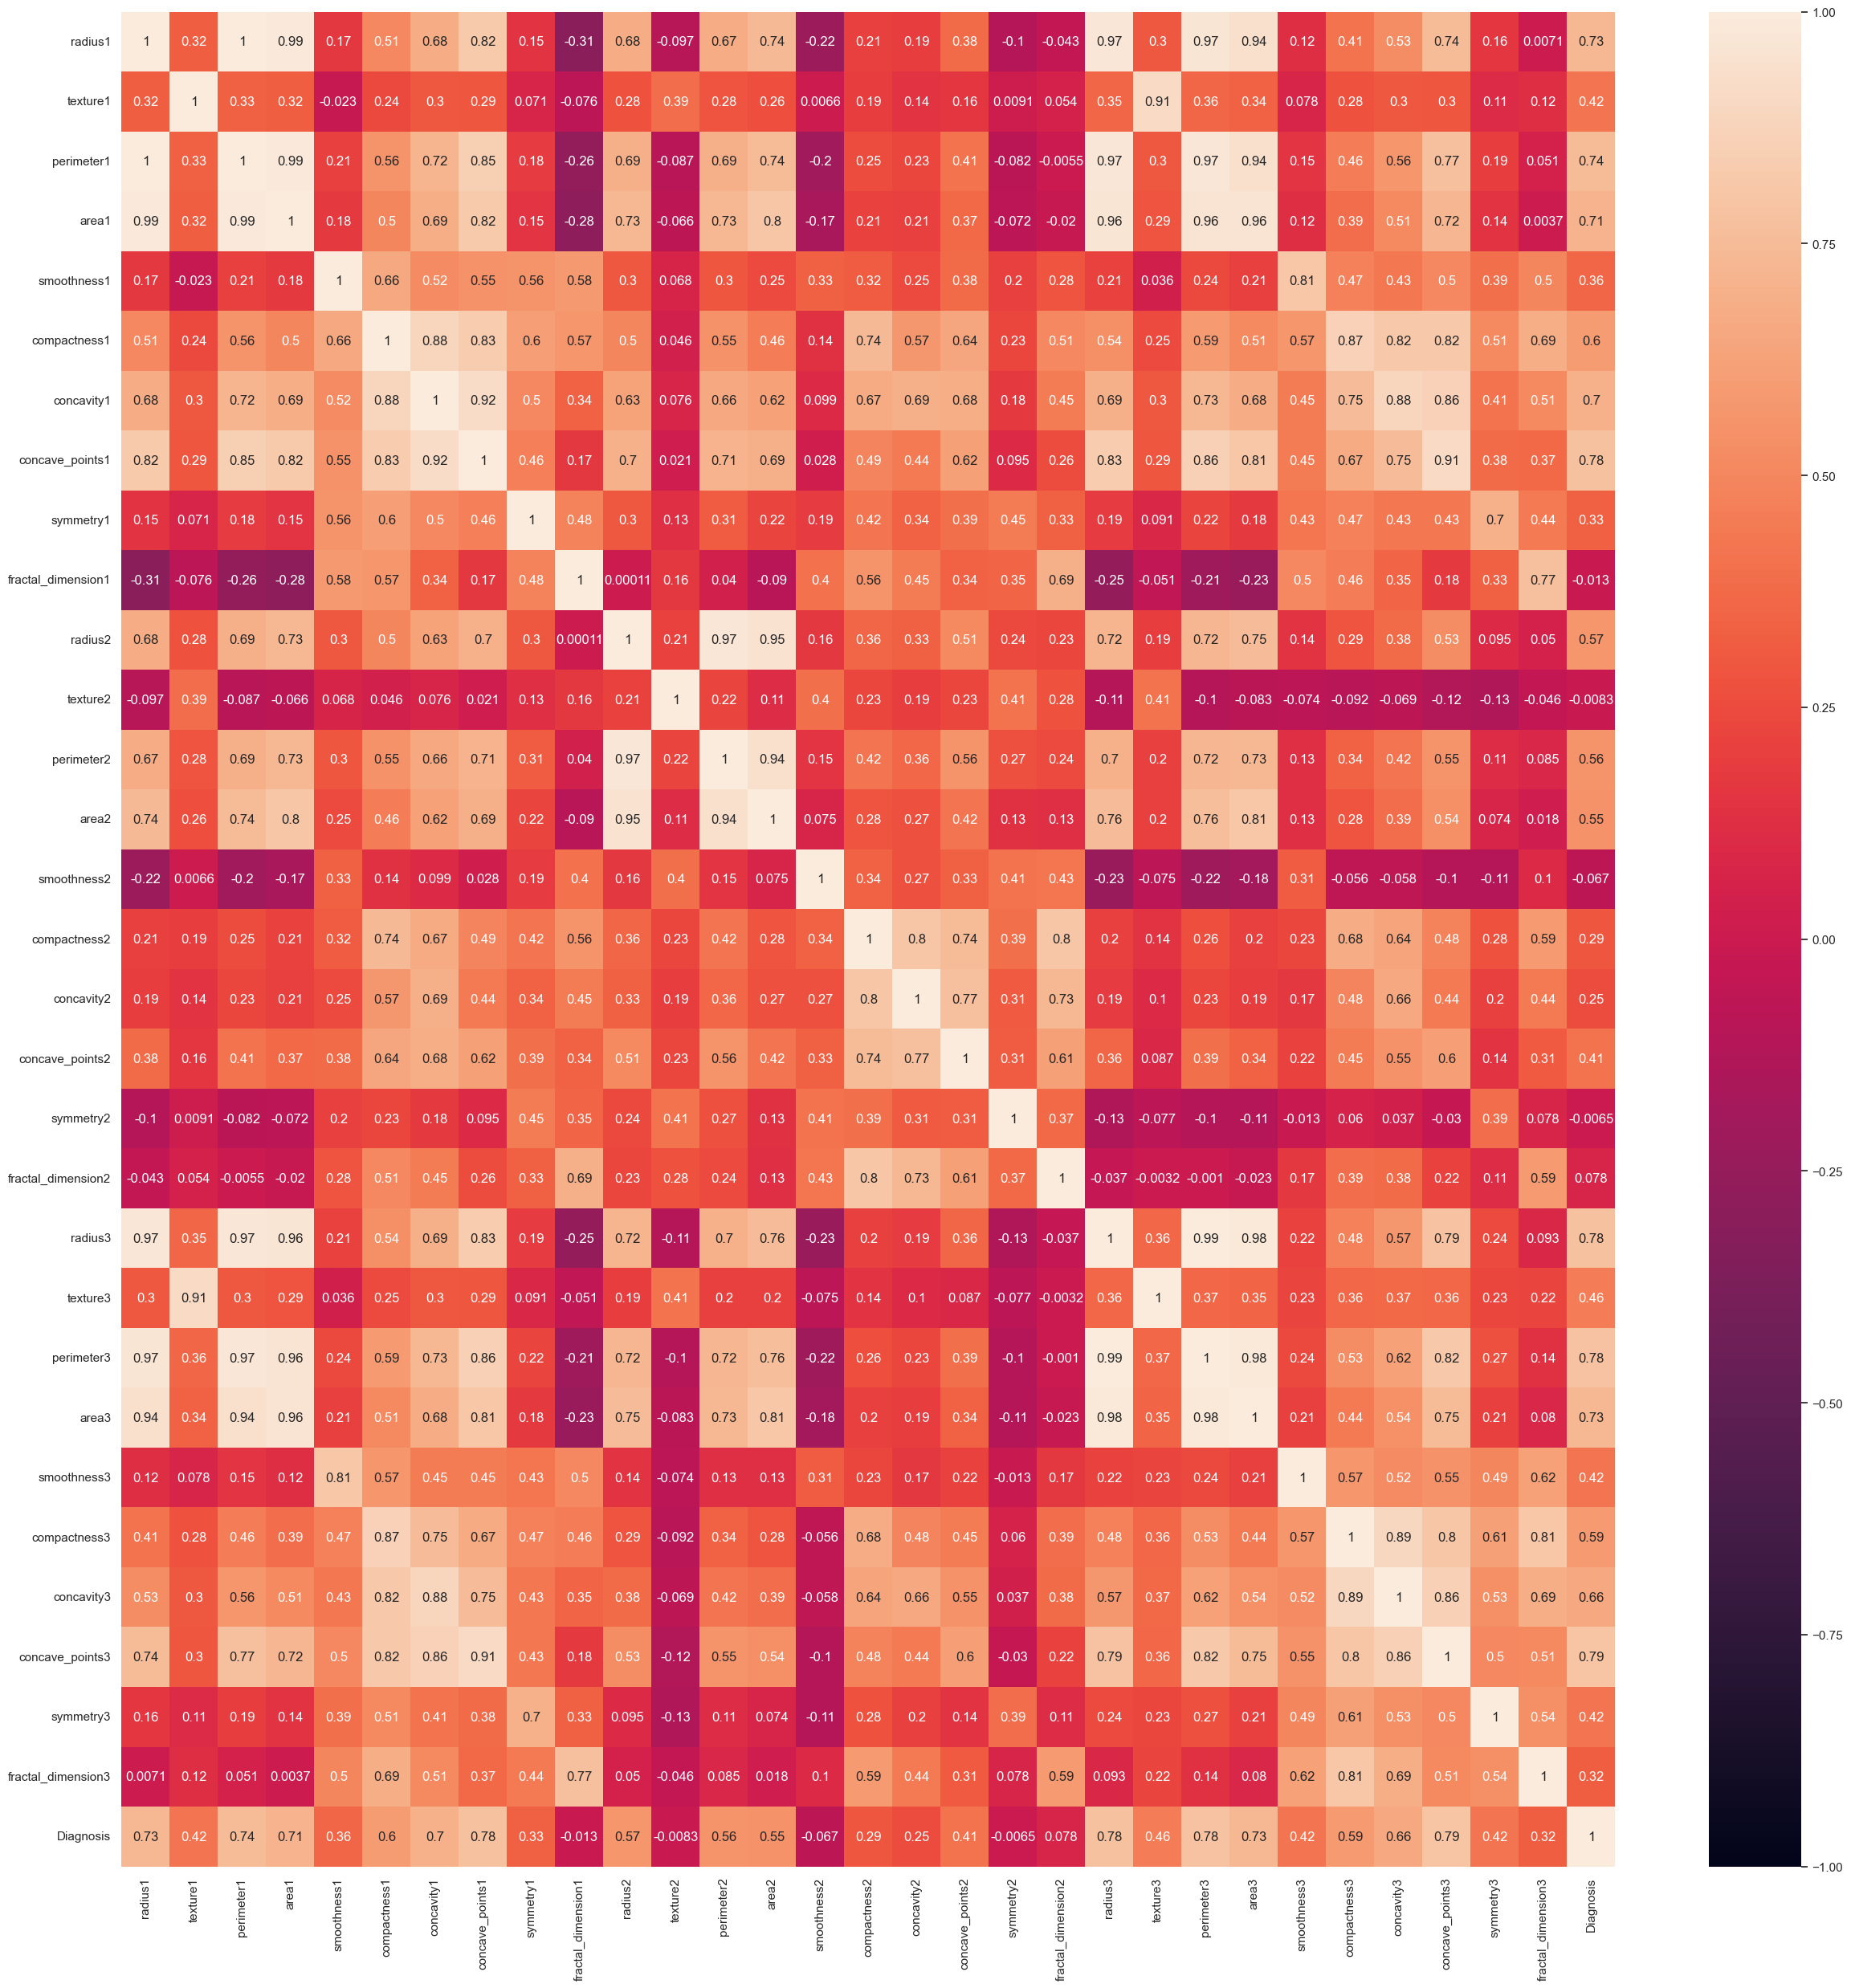

In [9]:
plt.figure(figsize =(30,30))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [10]:
threshold = 0.4
corr_matrix = data.corr(numeric_only=True)
high_corr_features = corr_matrix.index[abs(corr_matrix['Diagnosis']) > threshold].tolist()
high_corr_features.remove('Diagnosis')

X_selected = data[high_corr_features]
y = data['Diagnosis']

print(f"Features with correlation greater than {threshold}:")
print(high_corr_features)


Features with correlation greater than 0.4:
['radius1', 'texture1', 'perimeter1', 'area1', 'compactness1', 'concavity1', 'concave_points1', 'radius2', 'perimeter2', 'area2', 'concave_points2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3']


# Scalling

In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

# Model Preparation

In [12]:
X_selected = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, shuffle=True, random_state=42)

# Logistic Regression

In [13]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [14]:
y_pred_log_reg = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred_log_reg))

0.9766081871345029


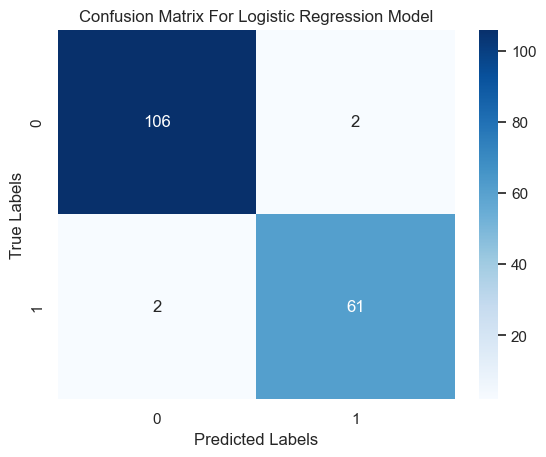

In [15]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression Model')
plt.show()

In [16]:
print(classification_report(y_test, y_pred_log_reg))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [17]:
def sigmoid(s):
    return 1.0 / (1.0 + np.exp(-s))

def logicstic_sigmoid_regression(X, y, eta=0.05, tol=1e-4, max_iter = 10000):
    N = X.shape[0]
    d = X.shape[1]
    w = [np.random.randn(d, 1)]
    count = 0
    check_w_after = 20

    while count < max_iter:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X.iloc[i].to_numpy().reshape(d, 1)
            yi = y.iloc[i]
            zi = sigmoid(w[-1].T @ xi)
            w_new = w[-1] + eta * (yi - zi) * xi
            count += 1
            # stop condition
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

def predict(X_new, w):
    labels = []
    for i in range(X_new.shape[0]):
        x = X_new.iloc[i].to_numpy().reshape(1, X_new.shape[1])
        z = sigmoid(x @ w)
        labels.append(1 if z >= 0.5 else 0)

    return np.array(labels)


w = logicstic_sigmoid_regression(X_train, y_train)[-1]

y_pred_log = predict(X_test, w)
accuracy_score(y_test, y_pred_log)

C:\Users\Hiep\AppData\Local\Temp\ipykernel_28592\1774838618.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-s))


0.8947368421052632

# SVM

In [18]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [19]:
y_pred_svc = svc_model.predict(X_test)
print(accuracy_score(y_test, y_pred_svc))


0.935672514619883


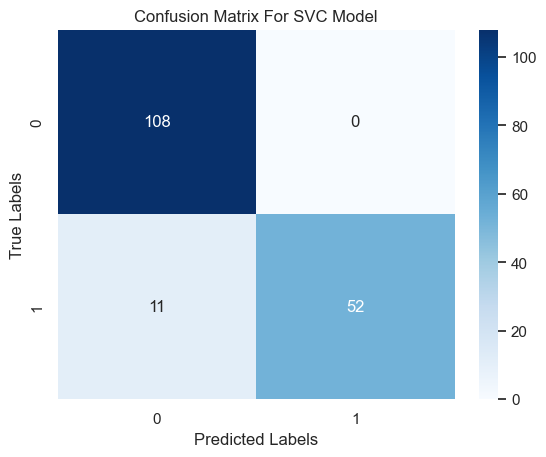

In [20]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For SVC Model')
plt.show()

In [21]:
print(classification_report(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       119
           1       0.83      1.00      0.90        52

    accuracy                           0.94       171
   macro avg       0.91      0.95      0.93       171
weighted avg       0.95      0.94      0.94       171



# Decision Tree


In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)


0.935672514619883

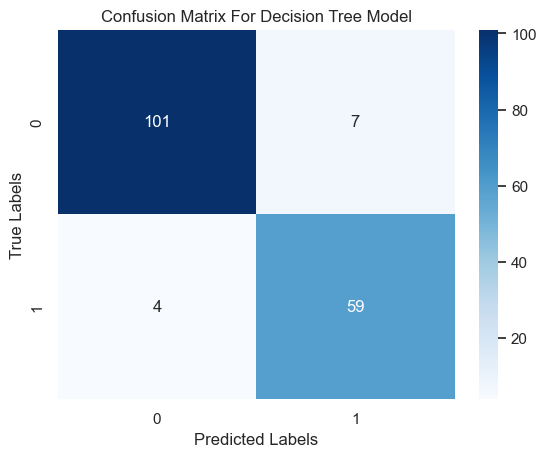

In [26]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Decision Tree Model')
plt.show()

In [27]:
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.94      0.89      0.91        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [29]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        # Convert to numpy arrays if input is pandas
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values
            
        n_features = X.shape[1]
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Find best split
        best_feat, best_thresh = self._best_split(X, y, n_features)

        # Split data
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)

        return Node(best_feat, best_thresh, left, right)

    def _best_split(self, X, y, n_features):
        best_gain = -1
        split_idx, split_thresh = None, None

        for feat_idx in range(n_features):
            thresholds = np.unique(X[:, feat_idx])
            for thresh in thresholds:
                gain = self._information_gain(y, X[:, feat_idx], thresh)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = thresh

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, threshold):
        # Parent entropy
        parent_entropy = self._gini(y)

        # Create children
        left_idxs, right_idxs = self._split(X_column, threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # Calculate weighted average of child entropy
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._gini(y[left_idxs]), self._gini(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # Information gain
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _gini(self, y):
        hist = np.bincount(y.astype(int))
        ps = hist / len(y)
        return 1 - np.sum([p * p for p in ps if p > 0])

    def _split(self, X_column, threshold):
        left_idxs = np.argwhere(X_column <= threshold).flatten()
        right_idxs = np.argwhere(X_column > threshold).flatten()
        return left_idxs, right_idxs

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        # Convert to numpy array if input is pandas
        if hasattr(X, 'values'):
            X = X.values
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right) 

In [30]:
dt_sub_model = DecisionTree(max_depth=10)
dt_sub_model.fit(X_train, y_train)
y_pred_dt_sub = dt_sub_model.predict(X_test)
accuracy_score(y_test, y_pred_dt_sub)

0.9239766081871345